In [1]:
import os 
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

In [19]:
index = ['sto_vol_all',
         'sto_vol_twt',
         'sto_rea_all',
         'sto_rea_twt',
         'sto_si1_all', 
         'sto_si2_all', 
         'sto_si3_all', 
         'sto_si1_twt', 
         'sto_si2_twt', 
         'sto_si3_twt',
         'stw_vol_dcl',
         'stw_vol_brt',
         'stw_si1_dcl',
         'stw_si2_dcl',
         'stw_si3_dcl', 
         'stw_si1_brt', 
         'stw_si2_brt',
         'stw_si3_brt']

In [46]:
sc = pd.DataFrame(np.zeros((18, 4)), index=index, columns=['btc', 'eth', 'aapl', 'spx'])
for i, file in enumerate(os.listdir('data/pred/')):
    _, source, type1, type2, symbol = file.split('.')[0].split('_')
    
    if type2 == 'fbp' or type1 == 'fbp':
        continue
        
    new = source + '_' + type1 + '_' + type2
    if type2.startswith('si'):
        new = source + '_' + type2 + '_' + type1

    data = pd.read_csv('data/pred/' + file, index_col=0)
    prices = pd.read_csv('data/prices/' + symbol + '_prices.csv', header=None, index_col=0)

    corr = pearsonr(data.values.ravel(), prices.values.ravel()) 
    sc.loc[new, symbol] = corr[0]
    print(i, file, corr)

1 pred_stw_dcl_si3_spx.csv (0.30230015520101694, 3.732820520429467e-07)
2 pred_stw_vol_brt_aapl.csv (-0.05107936782671617, 0.4014183707924509)
3 pred_sto_all_si2_btc.csv (-0.0432104815381214, 0.3911354073535315)
4 pred_sto_all_si1_eth.csv (-0.6639207555211618, 1.1286596070971462e-51)
6 pred_stw_brt_si3_spx.csv (0.35221577981813657, 2.305313079586823e-09)
7 pred_sto_twt_si3_aapl.csv (0.13873333605609767, 0.02210321330240852)
8 pred_sto_vol_all_btc.csv (0.3756085108997334, 1.0262476567294159e-14)
9 pred_stw_vol_dcl_spx.csv (-0.6112375776139451, 2.957536394261103e-29)
10 pred_sto_rea_all_spx.csv (0.4207447716855418, 4.283704546897021e-13)
11 pred_stw_brt_si3_eth.csv (0.21993562760043334, 1.0006709559803714e-05)
12 pred_sto_vol_all_eth.csv (0.5869212632076352, 5.025197946494713e-38)
14 pred_sto_twt_si2_spx.csv (-0.0035678762709407605, 0.9532929194118418)
15 pred_stw_dcl_si1_aapl.csv (0.3750403080306982, 1.6410380554710514e-10)
16 pred_sto_vol_all_aapl.csv (-0.06824259397856362, 0.262028093

In [50]:
sc.round(2)

,btc,eth,aapl,spx
sto_vol_all,0.38,0.59,-0.07,0.41
sto_vol_twt,0.52,0.68,0.05,0.42
sto_rea_all,0.43,0.11,-0.02,0.42
sto_rea_twt,0.42,0.04,-0.08,0.42
sto_si1_all,-0.07,-0.66,0.29,-0.00
sto_si2_all,-0.04,-0.56,0.32,-0.01
sto_si3_all,-0.10,-0.69,0.32,0.02
sto_si1_twt,-0.11,-0.67,0.14,0.01
sto_si2_twt,-0.09,-0.56,0.15,-0.00
sto_si3_twt,-0.11,-0.65,0.14,0.04


In [51]:
sc.round(2).to_excel('data/correlations.xlsx')

In [52]:
sc['avg'] = sc.apply(lambda x: x.abs().mean(), axis=1)

In [105]:
sc

,btc,eth,aapl,spx,avg
sto_vol_all,0.375609,0.586921,-0.068243,0.409943,0.360179
sto_vol_twt,0.523575,0.678329,0.045834,0.416322,0.416015
sto_rea_all,0.426664,0.109576,-0.019407,0.420745,0.244098
sto_rea_twt,0.424005,0.038998,-0.077439,0.419511,0.239988
sto_si1_all,-0.067791,-0.663921,0.292500,-0.000442,0.256163
sto_si2_all,-0.043210,-0.562973,0.319024,-0.005587,0.232699
sto_si3_all,-0.096733,-0.692974,0.324526,0.024828,0.284765
sto_si1_twt,-0.107249,-0.672748,0.136050,0.009097,0.231286
sto_si2_twt,-0.090847,-0.557590,0.150335,-0.003568,0.200585
sto_si3_twt,-0.111585,-0.649333,0.138733,0.037634,0.234321


In [54]:
sc.sort_values('avg', ascending=False)

,btc,eth,aapl,spx,avg
sto_vol_twt,0.523575,0.678329,0.045834,0.416322,0.416015
stw_vol_brt,0.538162,0.214479,-0.051079,-0.647248,0.362742
sto_vol_all,0.375609,0.586921,-0.068243,0.409943,0.360179
stw_vol_dcl,0.538040,0.217464,-0.031223,-0.611238,0.349491
stw_si1_brt,0.440832,0.203777,0.369297,0.353948,0.341964
stw_si2_brt,0.434007,0.204614,0.354360,0.341177,0.333540
stw_si3_brt,0.389069,0.219936,0.369663,0.352216,0.332721
stw_si1_dcl,0.418390,0.206645,0.375040,0.324237,0.331078
stw_si2_dcl,0.413144,0.187612,0.367421,0.322263,0.322610
stw_si3_dcl,0.364017,0.227843,0.340572,0.302300,0.308683


In [56]:
from plotly.offline import iplot
from plotly import tools as tls
from plotly import graph_objs as go
import cufflinks as cf
cf.go_offline()

In [101]:
a = (sc['avg']).sort_values(ascending=False)

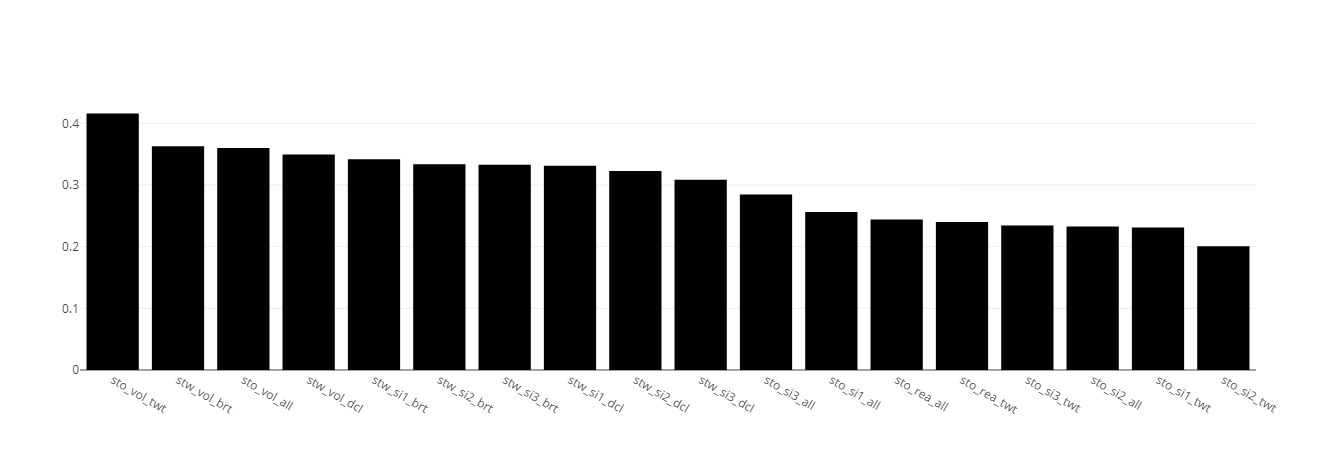

In [104]:
fig = go.Figure()
fig.add_trace(go.Bar(x=a.index, y=a, marker_color='rgb(0,0,0)', orientation='v'))
fig.layout.update(
    
)
iplot(fig)

In [97]:
{'bargap' : 5}

{'bargap': 5}